# Variational Bayes in Laplace

Given the random variable $x$ obey standard normal distribution，$y=\frac{1}{1+e^{-(Xw^T)}}$, which is the real distribution of $y$

## 1.  generation of data

### 1.1.  generation of  **$x$**

In [1]:
########构造x#################
from scipy.stats import multivariate_normal
import numpy as np
np.random.seed(9)####设置随机种子
n_samples = 1000####样本量
p = 10 ###样本维度
var = 3
cov = np.identity(p)*var
print(cov)####输出生成的协方差矩阵
center =np.zeros(10)
print(center)###输出生成的均值array
global data_x
data_x = multivariate_normal.rvs(mean=center, cov=cov, size=1000)
print(data_x.shape) 
print(data_x[1:10])#####输出生成的数据

[[3. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 3. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 3. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 3. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 3. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 3. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 3. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 3. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 3. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(1000, 10)
[[ 1.10139566e+00  3.01397158e+00  5.13868675e-01  1.22543229e+00
   3.15720951e+00  7.46113845e-01  2.67208609e+00 -1.56009483e+00
  -2.37507485e-01  2.24747278e+00]
 [ 1.16960397e+00  5.53530823e-02  1.59027534e+00  6.59061729e-01
   8.94374723e-01 -6.15292791e-01  3.61612374e-01  5.68824669e-01
  -8.62950609e-01 -3.62306365e+00]
 [-1.43046163e-01  4.25250110e+00 -4.62823029e+00 -1.58184612e+00
  -3.93720016e-01  4.66467916e-01  1.95801633e+00  1.80548534e+00
   2.25826593e+00  2.40651266e+00]
 [-1.13700922e+00 -9.74404948e-02 -8.65856736e-01  7.55900541e-01
  -6.50927291e-01 -1.59878956e+00  3.32077483e+00 -2.603321

### 1.2. generation of  $w$ and $y$

In [2]:
######构造w和y#######
global var
var = 3
#cov = np.identity()*var
#print(cov)####输出生成的协方差矩阵
center = 0
print(center)###输出生成的均值array
w = np.random.randn(p)*np.sqrt(var)+center
print(w.shape)
print(w)
global data_y
data_y= 1/(1+np.exp(-np.dot(data_x,w)))
print(data_y[1:10])
y_prob = data_y
#maxprob = max(y_prob)
global y
y = np.zeros(1000)
for i in range(y_prob.shape[0]):
    if (y_prob[i]>0.5):
        y[i] = 1
    else:
        y[i] = 0   

0
(10,)
[-2.76599012  3.09612755  3.67479028 -1.24344072  3.44916927  1.91886877
 -1.663089    0.88682911  1.40901029 -4.17858097]
[9.68259013e-01 9.99999979e-01 2.83488275e-05 2.33974438e-09
 1.95735896e-02 1.06968208e-19 9.99893300e-01 9.99433964e-01
 1.61227251e-07]


In [3]:
#from sklearn.datasets import load_iris
from sklearn import linear_model  
clf = linear_model.LinearRegression().fit(data_x, y)
clf.coef_

array([-0.07774498,  0.08103779,  0.09735719, -0.02784708,  0.08229567,
        0.06376151, -0.03678785,  0.01552198,  0.02753113, -0.10209337])

the *coef_* (the $\hat{w}$) with logistic regression model from sklearn keeps away from the real $w$ , what we need to do is to get the distribution $p(w|X,y)$. 
According to the Gaussian mixture model(GMM), which can approximate any distribution. Let the $ g(w;\mu,\Sigma) \approx p(w|X,y)$

## 2.  Kullback–Leibler divergence(K.L.)

$$
KL = E[log\frac{g(w;\mu,\Sigma)}{p(w|X,y)}] 
= E[log\frac{g(w;\mu,\Sigma)}{\frac{p(y|X,w)p(w)}{p(y|x)}}]
= E[log\frac{g(w;\mu,\Sigma)}{p(y|X,w)p(w)}+logp(y|X)]
= E[logg(w;\mu,\Sigma) - logp(y|X,w) - logp(w)] +logp(y|X)
$$

Let the $J=E[logg(w;\mu,\Sigma) - logp(y|X,w) - logp(w)]$, what we need to do is to minimize the $J$

$$
E(logp(y|X,w)) = log[p(y_1|X,w)p(y_2|X,w)p(y_3|X,w)\cdots p(y_N|X,w)] = \sum_{n=1}^N log p(y_n|X,w)=\sum_{n=1}^N log \frac{1}{1+e^{-X^Tw}}
$$



## 3. Laplace approximate

$$
g(w;\mu,\Sigma) \propto log (g(\hat{w};\mu,\Sigma))+ \frac{\delta log^{'}(g(w;\mu,\Sigma))}{\delta w}|_{w=\hat{w}} \frac{(w-\hat{w})}{1!}
+ \frac{\delta log^{''}(g(w;\mu,\Sigma))}{\delta w}|_{w=\hat{w}} \frac{(w-\hat{w})^2}{2!}
$$

when $w = \hat{w}$ , the First derivative is 0. $\hat{w}$ is the value of Newton's method, So:

$$
g(w;\mu,\Sigma) \propto log (g(\hat{w};\mu,\Sigma))+\frac{\delta log^{''}(g(w;\mu,\Sigma))}{\delta w}|_{w=\hat{w}} \frac{(w-\hat{w})^2}{2!}
$$

Let $K = g(\hat{w};\mu,\Sigma), \mu = \hat{w}, \sigma^2 = \frac{1}{v}, v =-\frac{\delta log^{''}(g(w;\mu,\Sigma))}{\delta w}|_{w=\hat{w}}$

the g is transformed into :
$$
log (g(w;\mu,\Sigma)) \propto logK - \frac{(w-\mu)^2}{2\sigma^2 }
$$
As a result, the next step is to solve the $\hat{w}$

### 3.1.  $\hat{w}$ of solution
As we all know , $p(w|x,y) = \frac{p(y|x,w)p(w)}{p(y|x)}$,then define the $log[g(w;x,y,\sigma^2)] = log[p(y|x,w)p(w|\sigma^2)]$. Obviously, the $\frac{log[g(w;x,y,\sigma^2)]}{p(w|x,y)} = C$, the $C$ is a constant, so if the maxmum of $log(g)$ is solved, the $\hat{w}$ is what we need.

- **First, we need to transform the function $log(g)$:**

$$
log[g(w;x,y,\sigma^2)] = log[p(y|x,w)]+log[p(w|\sigma^2)]=log[p(y=y_1|x_1,w)\cdotp(y=y_2|x_2,w)\cdots p(y=y_n|x_n,w)]+log[p(w|\sigma^2)]=\sum_{n=1}^N log[p(y = y_n|x_n,w)]+log[p(w|\sigma^2)]=\sum_{n=1}^N log[(\frac{1}{1+exp(-w^Tx_n)})^{y_n}\cdot (\frac{exp(-w^Tx_n)}{1+exp(-w^Tx_n)})^{1-y_n}]+log[p(w|\sigma^2)]
$$

- **Let $P_n = P(y_n = 1|w,x_n)$, the formula can be transformed as follows:**

$$
log[g(w;x,y,\sigma^2)] =log[p(w|\sigma^2)] + \sum_{n=1}^Nlog [P_n^{y_n}\cdot(1-P_n)^{1-y_n}] = log[p(w|\sigma^2)] + \sum_{n=1}^N({y_n}\cdot log P_n+ (1-y_n)\cdot log(1-P_n))
$$

- **$D$ is defined as the dimension of $w$, the formula can be transformed as follows:**
$$
log[g(w;x,y,\sigma^2)] = -\frac{D}{2}log2\pi-Dlog\sigma - \frac{1}{2\sigma^2}w^Tw+ \sum_{n=1}^N({y_n}\cdot log P_n+ (1-y_n)\cdot log(1-P_n))
$$
- **the next step is to solve for the first derivative**:
$$
\frac{\delta log[g(w;x,y,\sigma^2)]}{\delta w}= - \frac{1}{\sigma^2}w+\sum_{n=1}^N(\frac{y_n}{P_n}\frac{\delta P_n}{\delta w} - \frac{1-y_n}{1-P_n}\frac{\delta P_n}{\delta w})=- \frac{1}{\sigma^2}w+\sum_{n=1}^N x_n(y_n-P_n)
\space P_n = \frac{1}{1+exp(-w^Tx_n)}
$$
- **the next step is to solve for the second derivative**:
$$
\frac{\delta^2log[g(w;x,y,\sigma^2)]}{\delta w^2}= - \frac{1}{\sigma^2}-\sum_{n=1}^N(x_nx_n^TP_n(1-P_n))<0
$$
Because the second derivative is less than 0, the function must have a maximum. As a result, Newton method is used to solve the zero of the first derivative. Assume that $f(w) = \frac{\delta log[g(w;x,y,\sigma^2)]}{\delta w}$, $f^{(2)}(w) = \frac{\delta^2log[g(w;x,y,\sigma^2)]}{\delta w^2}$,
$$
w_{n+1} = w_n - \frac{f(w_n)}{f^{(1)}(w_n)}
$$

### 3.3. Gradient Descent
$$
\frac{\delta log[g(w;x,y,\sigma^2)]}{\delta w}= - \frac{1}{\sigma^2}w+\sum_{n=1}^N(\frac{y_n}{P_n}\frac{\delta P_n}{\delta w} - \frac{1-y_n}{1-P_n}\frac{\delta P_n}{\delta w})=- \frac{1}{\sigma^2}w+\sum_{n=1}^N x_n(y_n-P_n)
$$
$$
w_{n+1} = w_n - \eta{f^{'}(w_n)}
$$

## My Question

- 如果$\mu$和$v$都已经可以通过泰勒展开求出来了，那么K.L散度存在的意义是什么，<div style = "color:red">KL散度看有多接近</div>
- $w$的先验概率是如何确定的.<div style = "color:red">先验概率可以先自己随便设置一个</div>

In [3]:
def delta1(w): 
    initial_w = w
    derivative1 = -(1/var)*initial_w
    temp = np.zeros(data_x.shape)
    for i in range(0,data_x.shape[0]):
        temp[i,] = data_x[i,]*(y[i]-1/(1+np.exp(-np.dot(data_x[i,],initial_w))))
    derivative1 = temp.sum(axis = 0)+derivative1
    return (derivative1)

In [4]:
def delta2(w):
    initial_w = w
    derivative2 = -(1/var)
    temp = np.zeros(data_x.shape)
    for i in range(0,data_x.shape[0]):
        temp[i,] = data_x[i,]*data_x[i,]*(1-1/(1+np.exp(-np.dot(data_x[i,],initial_w))))*1/(1+np.exp(-np.dot(data_x[i,],initial_w)))
    derivative2 = temp.sum(axis = 0)-derivative2
    return(derivative2)

In [48]:
def cal(w):
    D = w.shape[0]
    tempsum = 0
    for i in range(0,data_x.shape[0]):
        p = 1/(1+np.exp(-np.dot(data_x[i,],w)))
        tempsum = tempsum + y[i] * np.log(p) + (1-y[i]) * (1-np.log(p))
    res = tempsum- (D/2)*np.log(2*np.pi) - D * np.log(var) - 1/(2*(var**2))*np.dot(w.T,w)
    #print(tempsum-res)
    return (res)

$$
log[g(w;x,y,\sigma^2)] = -\frac{D}{2}log2\pi-Dlog\sigma - \frac{1}{2\sigma^2}w^Tw+ \sum_{n=1}^N({y_n}\cdot log P_n+ (1-y_n)\cdot log(1-P_n))
$$

## 4. 牛顿法

In [51]:
initial_w = np.random.randn(p)*np.sqrt(var)####利用w的先验随机生成w
wn = initial_w

In [ ]:
while(True):
    wn1 = wn - delta1(wn)/delta2(wn)
    #print( delta1(wn))
    #print(delta2(wn))
    delta = wn1 - wn 
    print(delta)
    print(wn1)
    if(max(abs(delta))<0.0001):
        break
    wn = wn1

python 优化函数。|

## 5. 梯度下降

In [8]:
w0

array([-3.37962924,  3.87379924,  4.43482696, -1.54002588,  4.30916493,
        2.45393028, -1.98541913,  1.10206495,  1.66212422, -5.15182932])

In [6]:
eta = 0.01####学习率
#var = 5
initial_w = np.random.randn(p)*np.sqrt(var)####利用w的先验随机生成w
w0 = initial_w
epsilon = 1
i = 0
rec = []
while(epsilon>0.001):
    w1 = w0 + eta * delta1(w0)
    epsilon = abs(cal(w1) - cal(w0))
    rec.append(epsilon) 
    i = i+1
    w0 = w1
    print(epsilon)
mu = w0
v = -delta2(w0)
sigma = 1/v

4180.899244495515
527.8167318090555
10.293798610252452
27.34635808153871
30.369675082154572
30.879081716758265
30.219035236749733
29.616232562242658
28.997125338755723
28.41000815287589
27.841451603077076
27.2925890893639
26.761359145792085
26.246947459463627
25.74844931583084
25.265103725691915
24.796196173384487
24.34106438949675
23.899088165298963
23.469686107155212
23.05231215927961
22.64645285312963
22.251624816855838
21.867372540422366
21.493266343724827
21.128900524659002
20.773891667497082
20.427877094294672
20.09051344620093
19.761475380812954
19.440454375540867
19.127157626176086
18.821307032413642
18.52263826208491
18.230899886890256
17.945852583614396
17.6672683947354
17.394930043439672
17.12863029838354
16.868171383907793
16.61336443199616
16.36402897251537
16.119992458717206
15.881089824731134
15.647163073365846
15.418060890861852
15.193638287165413
14.973756259685615
14.758281478249955
14.547085990544474
14.34004694567193
14.137046335039486
13.937970749116175
13.74271114

0.2363644624401786
0.23407457626126416
0.2318070164465098
0.22956156258078408
0.22733799644083774
0.2251361020726108
0.22295566561388114
0.2207964754779823
0.21865832207913627
0.21654099809074978
0.21444429812618182
0.21236801898157864
0.21031195950581605
0.2082759204440663
0.20625970471701294
0.20426311711798917
0.202285964438488
0.20032805541450216
0.19838920070560562
0.1964692128576644
0.19456790630647447
0.19268509737594286
0.19082060419532354
0.1889742467619726
0.18714584681492852
0.18533522794677992
0.18354221547633642
0.1817666364941033
0.18000831978406495
0.17826709591281542
0.17654279709040566
0.17483525720308535
0.17314431180420797
0.1714697981315112
0.16981155497978762
0.16816942280911462
0.1665432436593619
0.16493286112108763
0.16333812038283213
0.1617588681201596
0.16019495265300066
0.15864622365825198
0.15711253241533996
0.15559373167798185
0.1540896756332586
0.1526002199107097
0.15112522162962705
0.14966453928172996
0.1482180328175673
0.1467855634946318
0.145366994026517

0.004672879714235023
0.004627895161320339
0.00458334372342506
0.004539221229606483
0.004495523529840284
0.004452246560504136
0.0044093862425143016
0.004366938598650449
0.00432489960348903
0.004283265380763623
0.0042420319659868255
0.00420119556656573
0.004160752329880779
0.004120698438782711
0.004081030207998992
0.00404174387040257
0.0040028357598203
0.003964302260101249
0.003926139741452062
0.003888344623192097
0.0038509133864863543
0.0038138425297802314
0.003777128575165989
0.003740768056559318
0.003704757607920328
0.0036690938813990215
0.003633773465480772
0.003598793118726462
0.0035641495369418408
0.0035298394668643596
0.0034958597152581206
0.0034622071052581305
0.003428878490922216
0.0033958707263082033
0.003363180740052485
0.0033308054798908415
0.0032987418926495593
0.0032669869942765217
0.0032355378007196123
0.003204391398867301
0.003173544807395956
0.0031429952223334112
0.0031127397223826847
0.003082775500843127
0.003053099747376109
0.003023709688022791
0.002994602555190795
0.0

## 5.1 生成大量的$w$

In [11]:
w

array([-2.76599012,  3.09612755,  3.67479028, -1.24344072,  3.44916927,
        1.91886877, -1.663089  ,  0.88682911,  1.40901029, -4.17858097])

In [12]:
mu

array([-3.37962924,  3.87379924,  4.43482696, -1.54002588,  4.30916493,
        2.45393028, -1.98541913,  1.10206495,  1.66212422, -5.15182932])

In [13]:
sigma

array([-0.01483976, -0.02105108, -0.02079754, -0.01687106, -0.01979979,
       -0.01581618, -0.01593338, -0.01546129, -0.01360087, -0.020146  ])

In [14]:
w_hat = np.matrix(np.zeros(w.shape[0]*100).reshape(w.shape[0],100))
for j in range(0,w.shape[0]):
    w_hat[j,] = np.random.randn(100)*sigma[j]+mu[j]
print(w_hat.shape)

(10, 100)


In [15]:
w_hat[0,]

matrix([[-3.37797188, -3.39639901, -3.3748149 , -3.37046056, -3.40652584,
         -3.39589622, -3.3823633 , -3.40532868, -3.40162513, -3.38182774,
         -3.38137078, -3.39132401, -3.38775465, -3.3828818 , -3.41670593,
         -3.35098014, -3.37202793, -3.40040416, -3.40676289, -3.37124866,
         -3.38897835, -3.33832317, -3.36753324, -3.34843485, -3.36678836,
         -3.38828043, -3.38592799, -3.37889129, -3.38237598, -3.40485849,
         -3.36520207, -3.39295312, -3.37470367, -3.3796353 , -3.36949586,
         -3.35355273, -3.38138456, -3.36168177, -3.35752646, -3.39325322,
         -3.35559973, -3.39039454, -3.38906176, -3.37315856, -3.39075283,
         -3.39118078, -3.3877891 , -3.38311047, -3.37963096, -3.36790271,
         -3.38677077, -3.376067  , -3.36194473, -3.37208702, -3.36301926,
         -3.3783089 , -3.38181798, -3.37222581, -3.39293204, -3.39545714,
         -3.336764  , -3.3698699 , -3.36448945, -3.35906173, -3.38804793,
         -3.37668551, -3.37874335, -3.

In [16]:
w_hat[:,0]

matrix([[-3.37797188],
        [ 3.85710973],
        [ 4.44536904],
        [-1.50116435],
        [ 4.31270896],
        [ 2.431996  ],
        [-1.97924496],
        [ 1.09658573],
        [ 1.65301503],
        [-5.16004716]])

## 5.2 拟合结果

In [17]:
def logistic(x,w):
    data_y= 1/(1+np.exp(-np.dot(data_x,w)))
    return (data_y)

## 5.3 预测

In [18]:
pred_y = np.matrix(np.zeros(data_x.shape[0]).reshape(data_x.shape[0],1))
for i in range(0,w_hat.shape[1]):
    pred_y = pred_y + logistic(data_x,w_hat[:,i])
pred_y = pred_y / w.shape[0]

In [19]:
pred_label = np.zeros(1000)
for i in range(pred_y.shape[0]):
    if (pred_y[i]>0.5):
        pred_label[i] = 1
    else:
        pred_label[i] = 0   

In [20]:
print("准确率为：")
sum(pred_label == y)/len(y)

准确率为：


0.933

In [21]:
print("预测精度为：")
np.sqrt(np.mean(np.array(pred_y - (np.matrix(y_prob).T))**2))

预测精度为：


6.250727303443535

## 5.4 方法比较

In [142]:
from sklearn import linear_model        #表示，可以调用sklearn中的linear_model模块进行线性回归。
import numpy as np
model = linear_model.LinearRegression()
model.fit(data_x, y_prob)
display(model.intercept_)  #截距
display(model.coef_)  #线性模型的系数
pred = model.predict(data_x)
print('均方根误差:{:.2f}'.format(np.sqrt(np.mean((pred - y_prob) ** 2))))
pred_ols_label = np.zeros(1000)
for i in range(pred.shape[0]):
    if (pred[i]>0.5):
        pred_ols_label[i] = 1
    else:
        pred_ols_label[i] = 0
print("准确率为：")
sum(pred_ols_label == y)/len(y)

0.49790228825017463

array([-0.0778035 ,  0.07916073,  0.09882881, -0.02792082,  0.08068515,
        0.06042243, -0.03774281,  0.01563705,  0.02977495, -0.10106615])

均方根误差:0.26
准确率为：


0.969

In [178]:
(w-np.mean(w))/np.std(w)

array([-1.22960699,  1.00590698,  1.22657956, -0.64898397,  1.14053917,
        0.55696027, -0.80901651,  0.16339276,  0.36252614, -1.7682974 ])

In [166]:
pred[10:15]-y_prob[10:15]

array([0.19361203, 0.30090584, 0.31981479, 0.00445859, 0.11385817])

In [165]:
y_prob[10:15]

array([1.57740486e-05, 1.58600395e-04, 1.24320914e-03, 2.00473944e-09,
       1.31219291e-07])

In [164]:
np.array(pred_y - (np.matrix(y_prob).T))[10:15]

array([[-6.66068289e-06],
       [ 1.74428411e-04],
       [ 2.42494690e-03],
       [-1.75636756e-09],
       [-1.03795728e-07]])

In [171]:
from sklearn.linear_model import LogisticRegressionCV,LinearRegression
lr = LogisticRegressionCV(multi_class="ovr",fit_intercept=True,Cs=np.logspace(-2,2,20),cv=2,penalty="l2",solver="lbfgs",tol=0.01)
re = lr.fit(data_x,y)
r = re.score(data_x,y)
print("R值(准确率):",r)
print("参数:",re.coef_)
print("截距:",re.intercept_)

R值(准确率): 0.999
参数: [[-11.57277267  12.96404414  15.44018899  -5.25203349  14.79914255
    8.1335787   -6.87741363   3.63224953   5.87521227 -17.86338241]]
截距: [-0.36399168]


## 5.5 MQ

- 为什么用线性回归预测出来的参数与原参数不同（是否经过了标准化？？）
- VB的效果在不同的样本中表现的差异性较大，因此造成了精度的下降
- future： 因为现在的w是由一个正态分布生成的，但在现实生活中不同特征的数值服从的正态分布往往不同，因此效果可能会更好

## 5.6 重新生成$w$

In [24]:
var_w = range(0,p)
center_w = range(0,p)
n_w = 100
w_temp = np.matrix(np.zeros(n_w*p).reshape(n_w,p))
for i in range(0,p):
    w_temp[:,i] = np.matrix((np.random.randn(n_w)*np.sqrt(var_w[i])+center_w[i]).reshape(n_w,1))
w_new = np.array(np.mean(w_temp, axis=0))

In [25]:
w_new

array([[0.        , 1.01765953, 2.07273947, 3.04665257, 4.1166877 ,
        4.71919111, 6.19202935, 7.22592054, 8.1422192 , 9.20451776]])

In [26]:
global data_y
data_y= 1/(1+np.exp(-np.dot(data_x,w_new.T)))
print(data_y[1:10])
y_prob = data_y
#maxprob = max(y_prob)
global y
y = np.zeros(1000)
for i in range(y_prob.shape[0]):
    if (y_prob[i]>0.5):
        y[i] = 1
    else:
        y[i] = 0   

[[1.00000000e+00]
 [7.74294483e-13]
 [1.00000000e+00]
 [9.99997755e-01]
 [2.52057224e-23]
 [1.00000000e+00]
 [9.96849692e-01]
 [9.91332305e-01]
 [9.99999999e-01]]


In [54]:
p

1.957740391461023e-06

In [53]:
np.random.randn(p)*np.sqrt(var)+center

TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [49]:
eta = 0.01####学习率
var = np.var(w_new)
center = np.mean(w_new)
initial_w = np.random.randn(p)*np.sqrt(var)+center####利用w的先验随机生成w
w0 = initial_w
epsilon = 1
i = 0
rec = []
while(epsilon>0.001):
    w1 = w0 + eta * delta1(w0)
    epsilon = abs(cal(w1) - cal(w0))
    rec.append(epsilon) 
    i = i+1
    w0 = w1
    print(epsilon)
mu = w0
v = -delta2(w0)
sigma = 1/v

TypeError: 'numpy.float64' object cannot be interpreted as an integer

# 6. 求解KL散度

$$
KL = E[log\frac{g(w;\mu,\Sigma)}{p(w|X,y)}] 
= E[log\frac{g(w;\mu,\Sigma)}{\frac{p(y|X,w)p(w)}{p(y|x)}}]
= E[log\frac{g(w;\mu,\Sigma)}{p(y|X,w)p(w)}+logp(y|X)]
= E[logg(w;\mu,\Sigma) - logp(y|X,w) - logp(w)] +logp(y|X)
$$

In [349]:
def cdfcal(w,mu,var):
    w = W.tolist()
    n = len(w)
    cdf = 1
    for i in range(0,n):
        cdf = cdf * stats.norm.cdf(w[i], mu[i], var[i])
    return (cdf)

In [350]:
logpy = 0;w  = w0;K = cal(w);cdf = 1;KL = 0
wh = np.matrix(np.zeros(w.shape[0]*100).reshape(w.shape[0],100))
for j in range(0,w.shape[0]):
    np.linspace(-4,4,100)
    mu1 = w[j] 
    sigma1 = sigma[j]
    lower = mu1 - 4*sigma1
    upper = mu1 + 4*sigma1
    wh[j,] = np.linspace(lower,upper,100)
for index in range(wh.shape[1]):
    W = wh[0:w.shape[0],index]
    for i in range(0,data_x.shape[0]):
        logpy = logpy+np.log(1/(1+np.exp(-np.dot(data_x[i,],W))))
    KL = KL+(cal(W) - logpy)*cdfcal(W,w,sigma)
w3 = np.linspace(-4,4,100)
Elogp = 0
for k in range(0,len(w3)):
    Elogp = Elogp + stats.norm.cdf(w3[k], center, np.sqrt(var))*np.log(stats.norm.cdf(w3[k], center, np.sqrt(var)))
#KL - Elogp

In [352]:
KL[0,0]

19385210.03323192

In [296]:
w3 = np.linspace(-4,4,100)
Elogp = 0
for k in range(0,len(w3)):
    Elogp = Elogp + stats.norm.cdf(w3[k], center, np.sqrt(var))*np.log(stats.norm.pdf(w3[k], center, np.sqrt(var)))

In [338]:
W

matrix([[-3.32027012],
        [ 3.9580035 ],
        [ 4.51801704],
        [-1.4725416 ],
        [ 4.38836399],
        [ 2.51719495],
        [-1.92168556],
        [ 1.1639101 ],
        [ 1.71652767],
        [-5.0712452 ]])

In [337]:
cdfcal(W,w,sigma)

0.0

In [313]:
wh = np.matrix(np.zeros(w.shape[0]*100).reshape(w.shape[0],100))
for j in range(w.shape[0]):
    mu1 = w[j] 
    sigma1 = sigma[j]
    lower = mu1 - 4*sigma1
    upper = mu1 + 4*sigma1
    wh[j,] = np.linspace(lower,upper,100)

In [315]:
wh.shape

(10, 100)

In [264]:
mu = w0
v = delta2(w0)
sigma = 1/v
logpy = 0
w  = w0
K = cal(w)
wh = np.zeros(10)
for j in range(0,w.shape[0]):
    mu1 = w0 
    sigma1 = sigma[j]
    wh[j] = (np.random.randn(1)*np.sqrt(sigma1)+mu1[j])

47.0551819045977


In [229]:
(wh-mu)*(wh-mu)/(2*sigma)

array([8.92342123e-01, 4.59247259e-02, 1.70683827e-02, 3.73888345e-01,
       2.39269131e-01, 2.59415310e-01, 2.72359885e-01, 3.37361546e-03,
       3.74467024e-05, 4.05817482e-03])

In [231]:
np.log(K)-(wh-mu)*(wh-mu)/(2*sigma)

array([8.06548327, 8.91190067, 8.94075701, 8.58393705, 8.71855626,
       8.69841008, 8.68546551, 8.95445178, 8.95778794, 8.95376722])

In [ ]:
# np.sqrt(sigma1)

# 7. GaussianMixture from sklearn 

In [196]:
import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])

In [197]:
def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.xlim(-9., 5.)
    plt.ylim(-3., 6.)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)

In [198]:

# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0., -0.1], [1.7, .4]])
X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
          .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]

In [199]:
# Fit a Gaussian mixture with EM using five components
gmm = mixture.GaussianMixture(n_components=5, covariance_type='full').fit(X)

D:\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


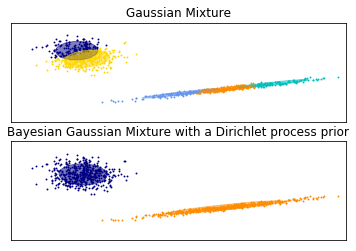

In [200]:
plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 0,
             'Gaussian Mixture')
# Fit a Dirichlet process Gaussian mixture using five components
dpgmm = mixture.BayesianGaussianMixture(n_components=5,
                                        covariance_type='full').fit(X)
plot_results(X, dpgmm.predict(X), dpgmm.means_, dpgmm.covariances_, 1,
             'Bayesian Gaussian Mixture with a Dirichlet process prior')
plt.show()

In [52]:
dpgmm.means_

array([[ -5.97878326e+00,   3.00076669e+00],
       [ -3.04824425e+00,   1.51571998e+00],
       [ -3.04816872e+00,   1.51568575e+00],
       [ -3.04841758e+00,   1.51580487e+00],
       [ -4.86789592e-02,  -5.20790518e-04]])

In [53]:
dpgmm.covariance_prior_

array([[ 10.51401566,  -4.13489296],
       [ -4.13489296,   2.57580056]])

In [59]:
dpgmm.mean_prior_

array([-3.01371312,  1.50010815])